In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import neighbors, linear_model, metrics

### Creating data frame from the given dataset.

In [34]:
df = pd.read_csv('GSE58606_data.csv')
df.tail()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual
128,7.069042,6.928371,6.361283,6.419449,7.047141,7.177212,6.653090,6.749214,6.404046,6.188651,...,7.267664,7.730168,6.023850,5.820426,6.118422,6.035515,5.776698,6.312001,1,primary breast cancer
129,7.220528,7.135147,6.358755,6.525857,7.054967,7.533287,6.645902,6.825213,6.416208,6.219274,...,6.557431,7.997207,6.125245,5.822034,6.008232,6.000131,5.807077,6.336421,1,primary breast cancer
130,6.753913,6.634270,6.167049,6.404217,6.760727,6.811819,6.340138,6.595280,6.340526,6.124168,...,7.216755,6.498206,6.160170,5.833019,5.949871,6.577482,6.395739,6.546783,1,primary breast cancer
131,6.949213,8.136970,6.530446,6.340408,6.839192,7.641705,7.269473,6.743930,6.403648,6.189620,...,7.165452,6.852333,5.975425,6.035830,6.323667,6.424863,5.780869,6.318444,0,normal breast tissue
132,7.266969,7.864109,6.411671,6.510445,7.053551,7.967349,8.531716,7.375104,6.501873,6.269286,...,6.447885,7.613908,6.078980,5.831657,6.100722,5.912673,5.799223,6.348078,1,primary breast cancer


## Data Analysis
This dataset has total 1928 columns, In which 1926 columns has float64 datatype, 1 has int64 and another 1 with object datatype, along with 133 indices.<br>
Here we have last 2 target columns which represents:<br>
    1: 'primary breast cancer'<br>
    0: 'normal breast tissue'

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 1928 entries, 4040 : hsa-miR-9-5p to target_actual
dtypes: float64(1926), int64(1), object(1)
memory usage: 2.0+ MB


### Unbalanced dataset
Here we have 122 positive sample while only 11 negative sample, which is consider as unbalanced dataset.

In [36]:
df['target'].value_counts()

1    122
0     11
Name: target, dtype: int64

We don't have any NA value in our dataset.

In [37]:
sum(df.isnull().sum())

0

### Normalization
As per the above observation, we need to upsample the minority data in target column. With the help of the resample function we are generating the duplicate values where target columns has value '0'.<br>
Now, we have equal samples for both 0 and 1, which is 122.

In [38]:
df_majority = df[(df['target']==1)]
df_minority = df[(df['target']==0)]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=122, random_state=7)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled['target'].value_counts()

0    122
1    122
Name: target, dtype: int64

### Extracting features and targets
<li>'target_actual' column is the categorical form of the 'target' column. So, we have to remove that as well from our feature dataset(X).</li>

In [39]:
X = df_upsampled.drop(columns=['target', 'target_actual'])
y = df_upsampled['target']

### Splitting and Training the model
Splitting the data into 75% of training samples and 25% of test samples and Train the model for 11 neighbors, Which gives the <b>97%</b> accuracy on out test samples.<br>
Note:- I have choosed the <b>11</b> neighbours cause <b>large number</b> can add more confidence to predict the output and <b>odd number</b> avoids any ties between the 2 classes.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)
n_neighbors = 11
knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)
knn_model = knn.fit(X_train, y_train)
print(f'KNN model accuracy for test set: {knn_model.score(X_test, y_test):.2f}')

KNN model accuracy for test set: 0.90


<li>y_true represents the actual data. (dtype=dataframe)</li>
<li>y_pred represents predicted data value based on X_test with help of knn_model. (dtype=array)</li>
<li>y_pred_df: here we are converting the array to the dataframe to represent the comparision table and used 'index=' parameter to avoid the NAN value because of improper indexing. (dtype=dataframe)</li>

In [41]:
y_true, y_pred = y_test, knn_model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=['Prediction'], index=X_test.index)
df_compare = pd.concat([y_true, y_pred_df], axis=1)
df_compare.rename(columns={"target":"Actual"}, inplace=True)
df_compare

,Actual,Prediction
44,1,1
46,1,1
7,0,0
111,1,1
7,0,0
...,...,...
47,1,1
121,1,1
21,1,1
84,0,0


### Confusion Matrix
Here, we have generated 2X2 matrix with below result using pandas crosstab function.
<li>25: True Negative</li>
<li>30: True Positive</li>
<li>6: False Negative</li>
<li>0: False Positive</li>

In [42]:
# cm = confusion_matrix(y_true, y_pred)
cm = pd.crosstab(df_compare['Actual'], df_compare['Prediction'], rownames=['Actual'], colnames=['Predicted'])
print(cm)
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print(f"\ntn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}")

Predicted   0   1
Actual           
0          25   6
1           0  30

tn:25, fp:0, fn:6, tp:30


The heatmap represents 2X2 confusion matrix of Actual and Predicted values by our model.
where, <br>[0,0] = True Negative, <br>[0,1] = False Positive, <br>[1,0] = False Negative, <br>[1,1] = True Positive

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

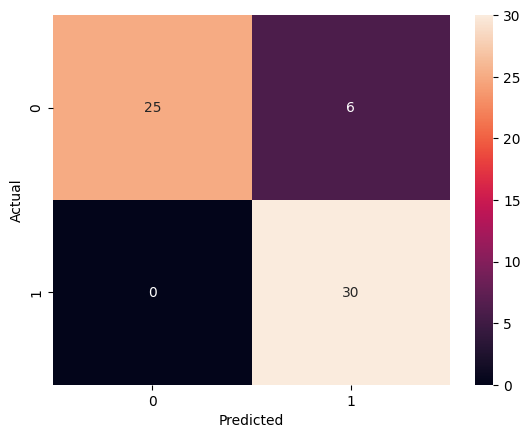

In [43]:
import seaborn as sn
sn.heatmap(cm, annot=True)
# metrics.plot_confusion_matrix(knn_model, X, y)

## Metrics
Accuracy = (tp + tn)/(tp + tn + fp + fn)<br>
recall (sensitivity) = tp/(tp + fn)<br>
precision = tp/(tp + fp)<br>
f1_score = 2\*recall\*precision/(recall + precision)
<li>Recall measures the proportion of actual positive labels correctly identified by the model.</li>
<li>Precision is defined as the proportion of correct positive predictions of all cases classified as positive.</li>
<li>accuracy is defined as the proportion of correct predictions in all predictions made.</li>
<li>F-measure is an evaluation metric for a classification defined as the harmonic mean of precision and recall. It is a statistical measure of the accuracy of a test or model.</li>
<li>f1_score=1 represents the perfect accuracy of the model based on precision and recall.</li>

In [44]:
# accuracy = accuracy_score(y_true, y_pred)
# sensitivity = recall_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# f1score = f1_score(y_true, y_pred)
accuracy = (tp + tn)/(tp + tn + fp + fn)
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1_score = 2*recall*precision/(recall + precision)
print(f' accuracy: {accuracy:.2f} \n recall: {recall:.2f} \n precision: {precision:.2f} \n f1_score: {f1_score:.2f}' )
print(classification_report(y_true, y_pred))

 accuracy: 0.90 
 recall: 0.83 
 precision: 1.00 
 f1_score: 0.91
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        31
           1       0.83      1.00      0.91        30

    accuracy                           0.90        61
   macro avg       0.92      0.90      0.90        61
weighted avg       0.92      0.90      0.90        61



## Experiment
Here, I am trying to find the perfect fit for our K value. For that I have performed the cross validation for all the odd numbers between 1 and 51. And here I observe with increasing the counts 'K' the accuracy of knn is decreasing with some extance.
A larger K value can make it high bias and computationally expensive while a small value can increase the effect of noise, so we need to choose a large enough k value which can produce better accuracy and that could be k=9 which can produce results with 96% accuracy.<br>
By using 'cross_val_score' we can cross validate our training samples with k-fold, we have used cv=5 means it will randomize the sample in 5 different groups. by taking the average of that 5 values we can get average cross validation accuracy score for the perticular k value.

In [46]:
from sklearn.model_selection import cross_val_score
cv_scores = dict()
for k in range(1,51,2):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores[k]=(np.mean(scores))
k_accuracy = [f"K_value_{x}: {y:.2f}" for x, y in cv_scores.items()]
for i in k_accuracy:
    print(i)

# knn = neighbors.KNeighborsClassifier(n_neighbors=105)
# scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
# np.mean(scores)

K_value_1: 0.99
K_value_3: 0.98
K_value_5: 0.98
K_value_7: 0.98
K_value_9: 0.96
K_value_11: 0.94
K_value_13: 0.92
K_value_15: 0.89
K_value_17: 0.87
K_value_19: 0.86
K_value_21: 0.87
K_value_23: 0.85
K_value_25: 0.84
K_value_27: 0.82
K_value_29: 0.80
K_value_31: 0.79
K_value_33: 0.79
K_value_35: 0.78
K_value_37: 0.77
K_value_39: 0.77
K_value_41: 0.77
K_value_43: 0.76
K_value_45: 0.76
K_value_47: 0.76
K_value_49: 0.75
